# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

### 01. Đọc dữ liệu

In [2]:
import pandas as pd
import numpy as np
US_BABY = pd.read_csv('C:\\Users\\Hung Anh\\Downloads\\TKMT_lab_02\\US_Baby_Names.csv')
print(US_BABY)

         Unnamed: 0       Id     Name  Year Gender State  Count
0             11349    11350     Emma  2004      F    AK     62
1             11350    11351  Madison  2004      F    AK     48
2             11351    11352   Hannah  2004      F    AK     46
3             11352    11353    Grace  2004      F    AK     44
4             11353    11354    Emily  2004      F    AK     41
...             ...      ...      ...   ...    ...   ...    ...
1016390     5647421  5647422     Seth  2014      M    WY      5
1016391     5647422  5647423  Spencer  2014      M    WY      5
1016392     5647423  5647424     Tyce  2014      M    WY      5
1016393     5647424  5647425   Victor  2014      M    WY      5
1016394     5647425  5647426   Waylon  2014      M    WY      5

[1016395 rows x 7 columns]


### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [10]:
import pandas as pd
US_BABY.sample(10, random_state=99)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
394,11743,11744,Isis,2005,F,AK,5
383632,2062747,2062748,Allen,2011,M,KY,13
208453,1076538,1076539,Zenaida,2014,F,FL,6
155915,805960,805961,Gilbert,2010,M,CO,9
139582,754819,754820,Eileen,2004,F,CO,10
491091,2696632,2696633,Summer,2014,F,MN,28
579862,3262886,3262887,Zoey,2007,F,NE,27
104977,563040,563041,Estefani,2014,F,CA,17
263318,1326546,1326547,Khari,2014,M,GA,7
511281,2815004,2815005,Abrielle,2013,F,MO,8


### 03. Cho biết kích thước dữ liệu

In [11]:
US_BABY.shape

(1016395, 7)

### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [13]:
US_BABY.isna().sum()
US_BABY = US_BABY.drop(US_BABY.columns[0],axis=1)
US_BABY = US_BABY.drop(US_BABY.columns[0],axis=1)
US_BABY.isna().sum()

Name      0
Year      0
Gender    0
State     0
Count     0
dtype: int64

### 05. Cho biết số lượng bé trai, bé gái?

In [18]:
# print(sum(US_BABY['Gender'] == 'M'))
# print(sum(US_BABY['Gender'] == 'F'))
US_BABY['Gender'].value_counts()

457549
558846


F    558846
M    457549
Name: Gender, dtype: int64

### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [33]:
#cách 1
df = US_BABY['Name'].unique(); #lấy những cái tên duy nhất bằng unique
df_len = len(df) #lấy số lượng tên khác nhau
print("cách 1: " + str(df_len),end="\n\n") #xuất số lượng tên khác nhau
#cách 2
# df2 = US_BABY['Name'].value_counts() #lấy số lượng tên người xuất hiện
# print("Cách 2:",end="\n\n")
# print(df2)

cách 1: 17632

Cách 2:

Riley      1112
Avery      1080
Jordan     1073
Peyton     1064
Hayden     1049
           ... 
Terryn        1
Yanna         1
Zemirah       1
Emmilyn       1
Coalton       1
Name: Name, Length: 17632, dtype: int64


### 07. Tên nào xuất hiện ít nhất?

In [17]:
df = US_BABY['Name'].value_counts() #lấy số lượng tên người xuất hiện
df.tail()

Terryn     1
Yanna      1
Zemirah    1
Emmilyn    1
Coalton    1
Name: Name, dtype: int64

### 08. Top 10 tên được sử dụng nhiều nhất?

In [34]:
df = US_BABY['Name'].value_counts()
df.head(10)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: Name, dtype: int64

## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

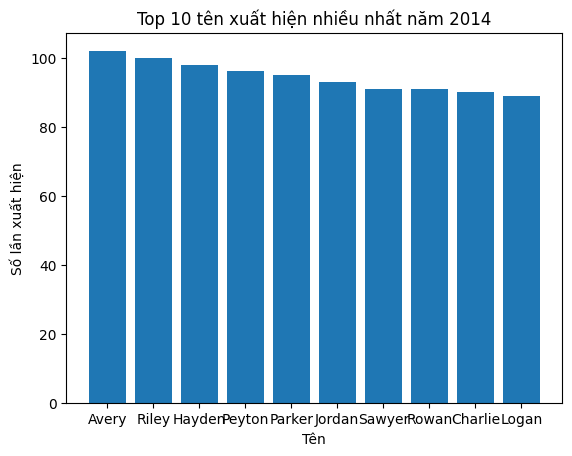

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Lấy dữ liệu từ us_baby ở nhưng hàng có năm là 2014
df_2014 = US_BABY[US_BABY['Year'] == 2014]
# Nhóm dữ liệu theo tên, đếm số lần xuất hiện của mỗi tên trong năm 2014
name_counts = df_2014['Name'].value_counts()
# Lấy top 10 tên xuất hiện nhiều nhất trong năm 2014
top_10_names = name_counts[:10]
plt.bar(top_10_names.index, top_10_names.values)
plt.xlabel('Tên')
plt.ylabel('Số lần xuất hiện')
plt.title('Top 10 tên xuất hiện nhiều nhất năm 2014')
plt.show()

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

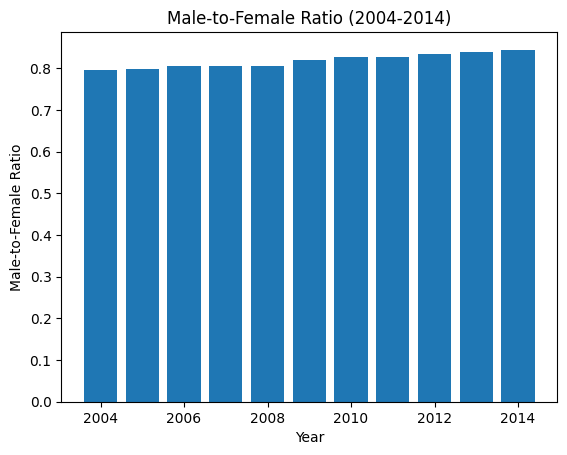

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

US_BABY = pd.read_csv('C:\\Users\\Hung Anh\\Downloads\\TKMT_lab_02\\US_Baby_Names.csv')
#lọc dữ liệu từ 2004 đến 2014
df_filtered = US_BABY.loc[(US_BABY['Year'] >= 2004) & (US_BABY['Year'] <= 2014)]
#gom nhóm dữ liệu gồm có year và gender 
grouped = df_filtered.groupby(['Year', 'Gender']).size()
#xoay ngược bảng
grouped = grouped.unstack()
#chia tỉ lệ nam nữ
male_female_ratio = grouped['M'] / grouped['F']

plt.bar(male_female_ratio.index, male_female_ratio.values)
plt.title('Male-to-Female Ratio (2004-2014)')
plt.xlabel('Year')
plt.ylabel('Male-to-Female Ratio')
plt.show()